In [ ]:
import pandas as pd
import csv
from matplotlib import pyplot as plt
import re

In [ ]:
df = pd.read_csv(
  "/content/ANERCorp_CamelLab_train.txt",
  delim_whitespace=True,  # any whitespace separates data
  names=["word", "label"],
  quoting=csv.QUOTE_NONE  ,
  index_col=False,  # no index
)

In [ ]:
df

,word,label
0,فرانكفورت,B-LOC
1,(د,O
2,ب,O
3,أ),O
4,أعلن,O
...,...,...
125097,في,O
125098,مختلف,O
125099,أنحاء,O
125100,المصنع,O


In [ ]:
df.iloc[0,1]

'B-LOC'

In [ ]:
senten = []
sentence = []
entities = []
entities_list = []
for x,y in enumerate(df["word"]):
   if y != ".":
    senten.append(y)
    entities.append(df.iloc[x,1])
   elif y == ".":
    full_senten = " ".join(senten)
    sentence.append({"sentence": full_senten,"num_words": len(senten),"entities":entities})
    senten=[]
    entities = []



In [ ]:
#senten = []
#sentence = []
#for x in df["word"]:
 # if x != ".":
  #  senten.append(x)
  #elif x == ".":
   # sentence.append({"sentence": senten,"num_words": len(senten)})
    #senten=[]


In [ ]:
df = pd.DataFrame(sentence,columns=["num_words","sentence","entities"])

In [ ]:
df

,num_words,sentence,entities
0,39,فرانكفورت (د ب أ) أعلن اتحاد صناعة السيارات في...,"[B-LOC, O, O, O, O, B-ORG, I-ORG, I-ORG, O, B-..."
1,19,وقال رئيس الاتحاد برند جوتشولك عند إعلان آخر ت...,"[O, O, O, B-PERS, I-PERS, O, O, O, O, O, O, O,..."
2,43,وعلي الرغم من أنه قال أنه يتوقع أن تظل صادرات ...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,16,ورأي جوتشولك أنه يتعين أن يبلغ الحجم الاجمالي ...,"[O, B-PERS, O, O, O, O, O, O, O, O, O, O, O, O..."
4,15,وأضاف قائلا نادرا ما كان من الصعب التكهن بالنس...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
...,...,...,...
4144,26,وتتميز السيارة الجديدة بمواصفات غير تقليدية من...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4145,28,ويسعي ديمورا إلي إنتاج خمسين وحدة سنويا من هذه...,"[O, B-PERS, O, O, O, O, O, O, O, O, O, O, O, O..."
4146,7,ومن المقرر البدء في تصنيعها عام 2008,"[O, O, O, O, O, O, O]"
4147,21,وعندما تدخل السيارة نتاليا مرحلة الانتاج فإنها...,"[O, O, O, B-MISC, O, O, O, O, O, O, B-ORG, B-M..."


In [ ]:
df.shape

(4149, 3)

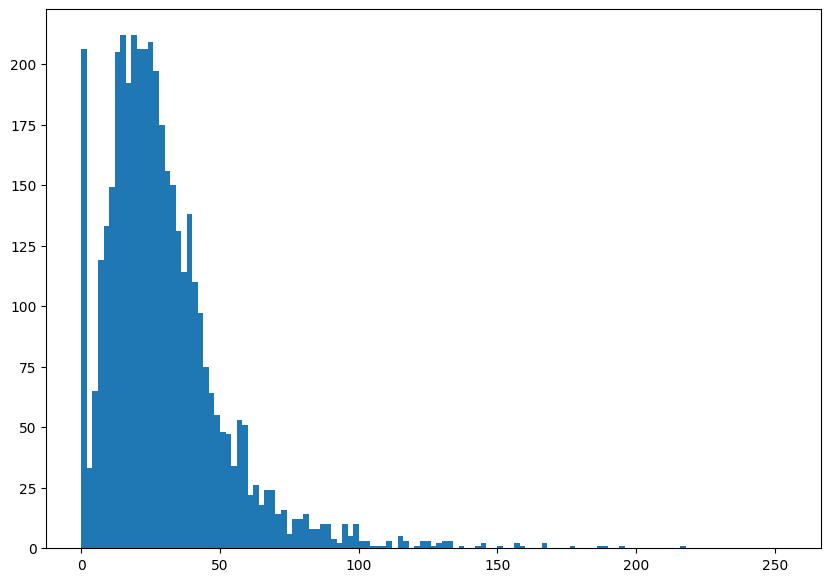

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df.num_words,bins = range(0,256,2));

In [ ]:
df.num_words.unique()

array([ 39,  19,  43,  16,  15,  24,  37,  18,  28,  29,  25,  30,  42,
        27,  51,  34,  23,  22,  21,  20,  47,  52,  31,  38,  35,  32,
        58,  33,  17,  41,  13,  36,  14,  49,  12,   9,  59,  11,   0,
         5,  26,  69,  87,  57,  46,  44,  48,  40,   7,  10,   3,   6,
         4,  61,  50,  80,  56,   8,  84, 117,  98, 123,  99,  45,  53,
         2,  68,  72,  54,  77, 102,  62,  66,  76,  67, 167,  65,  60,
        94, 125,  64,  90,  71,  75,  55, 158,  91,  63,  79,  83,  85,
        73, 130,  95, 103,   1,  70, 109, 100,  96,  88,  86, 145,  81,
       106,  78, 114, 189, 150, 129, 110, 132, 122, 128, 156, 137,  93,
       124,  97, 126, 104,  74, 133,  89, 187, 143, 166, 529, 177,  82,
       101, 120, 111,  92, 144, 216, 194])

In [ ]:
df[df["num_words"]==max(df.num_words)]

,num_words,sentence,entities
2792,529,في حفل تبادل الدروع والهدايا التذكارية اللجنة ...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [ ]:
df[df["num_words"]==min(df.num_words)]

,num_words,sentence,entities
109,0,,[]
110,0,,[]
117,0,,[]
121,0,,[]
125,0,,[]
...,...,...,...
3970,0,,[]
3976,0,,[]
3985,0,,[]
4097,0,,[]


In [ ]:
df = df[df["num_words"]!=0]

In [ ]:
df.shape

(3973, 3)

In [ ]:
df[df["num_words"]==min(df.num_words)]


,num_words,sentence,entities
1180,1,),[O]
1185,1,),[O]
1200,1,),[O]
1667,1,(,[O]
1996,1,اتهام,[O]
2162,1,C,[O]
2647,1,دي,[I-MISC]
2666,1,ب,[O]
2676,1,ف,[O]
2736,1,58,[O]


In [ ]:
df = df[df["num_words"]!=1]

In [ ]:
df.shape

(3943, 3)

In [ ]:
count =0
counter = []
for x in df['entities']:
  for y in x:
    if y != "O":
      count+=1
  try:
    counter.append(count/len(x))
  except ZeroDivisionError:
    pass
  count=0

In [ ]:
counter

[0.15384615384615385,
 0.10526315789473684,
 0.0,
 0.0625,
 0.0,
 0.041666666666666664,
 0.05405405405405406,
 0.05555555555555555,
 0.17857142857142858,
 0.1724137931034483,
 0.16,
 0.16666666666666666,
 0.16666666666666666,
 0.0,
 0.1724137931034483,
 0.037037037037037035,
 0.0784313725490196,
 0.3157894736842105,
 0.20588235294117646,
 0.14814814814814814,
 0.21739130434782608,
 0.3333333333333333,
 0.2727272727272727,
 0.16666666666666666,
 0.2,
 0.35714285714285715,
 0.19047619047619047,
 0.23809523809523808,
 0.3,
 0.2727272727272727,
 0.14893617021276595,
 0.11538461538461539,
 0.0,
 0.0,
 0.06451612903225806,
 0.125,
 0.07894736842105263,
 0.02631578947368421,
 0.17142857142857143,
 0.17857142857142858,
 0.17857142857142858,
 0.16,
 0.16666666666666666,
 0.16666666666666666,
 0.0,
 0.1724137931034483,
 0.037037037037037035,
 0.0784313725490196,
 0.3157894736842105,
 0.20588235294117646,
 0.14814814814814814,
 0.21739130434782608,
 0.3333333333333333,
 0.2727272727272727,
 0.166

(array([956.,  33.,  70., 115., 165., 126., 163., 140., 137., 164., 129.,
         73., 164., 133., 108., 101.,  90.,  60., 130.,  82.,  80.,  84.,
         61.,  57.,  45.,  43.,  17.,  61.,  37.,  37.,  39.,  16.,  21.,
         17.,  14.,   4.,  43.,  10.,   8.,   6.,  12.,   9.,   3.,  13.,
          4.,   7.,   7.,   1.,   8.,   3.,   5.,   0.,   1.,   0.,   8.,
          1.,   0.,   0.,   1.,   0.,   2.,   2.,   0.,   0.,   3.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   5.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.00923077, 0.01846154, 0.02769231, 0.03692308,
        0.04615385, 0.05538462, 0.06461538, 0.07384615, 0.08307692,
        0.09230769, 0.10153846, 0.11076923, 0.12      , 0.12923077,
        0.13846154, 0.14769231, 0.15692308, 0.16615385, 0.17538462,
        0.18461538, 0.19384615, 0.20307692, 0.

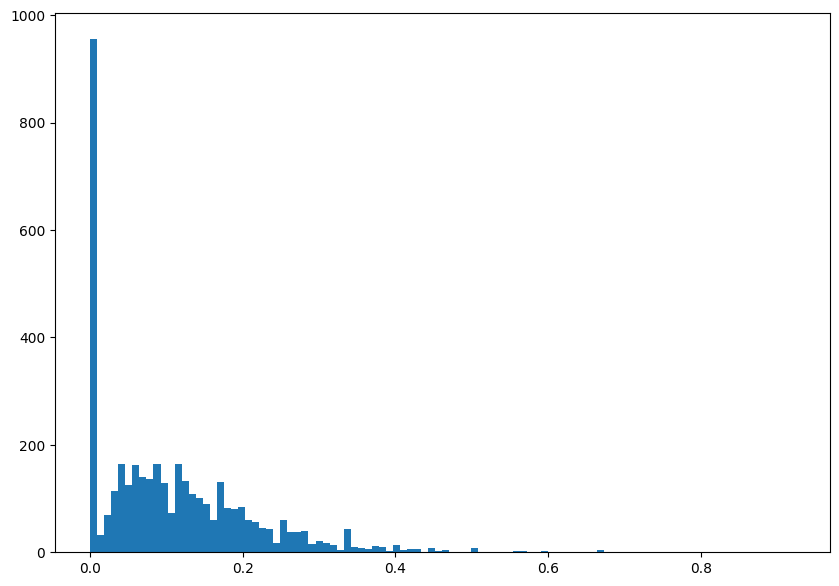

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(counter,bins=100)